
Sorting Algorithm Benchmark - Interactive Mode


Enter dataset size [1000]:  500
Include partially sorted dataset? (y/n) [n]:  n
Use logarithmic scale for visualization? (y/n) [y]:  n
Save visualizations to file? (y/n) [n]:  n



Available algorithms:
1. Bubble Sort
2. Selection Sort
3. Insertion Sort
4. Merge Sort
5. Quick Sort
6. Heap Sort
7. Timsort (Python)



Skip any algorithms? Enter numbers separated by spaces (e.g. '1 2')
Else, hit enter with blank input if you don't want to skip any algorithms!:  


Generating datasets of size 500...

Benchmarking sorting algorithms...
Benchmarking Bubble Sort on Random data... (1/21)
Benchmarking Selection Sort on Random data... (2/21)
Benchmarking Insertion Sort on Random data... (3/21)
Benchmarking Merge Sort on Random data... (4/21)
Benchmarking Quick Sort on Random data... (5/21)
Benchmarking Heap Sort on Random data... (6/21)
Benchmarking Timsort (Python) on Random data... (7/21)
Benchmarking Bubble Sort on Ascending data... (8/21)
Benchmarking Selection Sort on Ascending data... (9/21)
Benchmarking Insertion Sort on Ascending data... (10/21)
Benchmarking Merge Sort on Ascending data... (11/21)
Benchmarking Quick Sort on Ascending data... (12/21)
Benchmarking Heap Sort on Ascending data... (13/21)
Benchmarking Timsort (Python) on Ascending data... (14/21)
Benchmarking Bubble Sort on Descending data... (15/21)
Benchmarking Selection Sort on Descending data... (16/21)
Benchmarking Insertion Sort on Descending data... (17/21)
Benchmarking Merge

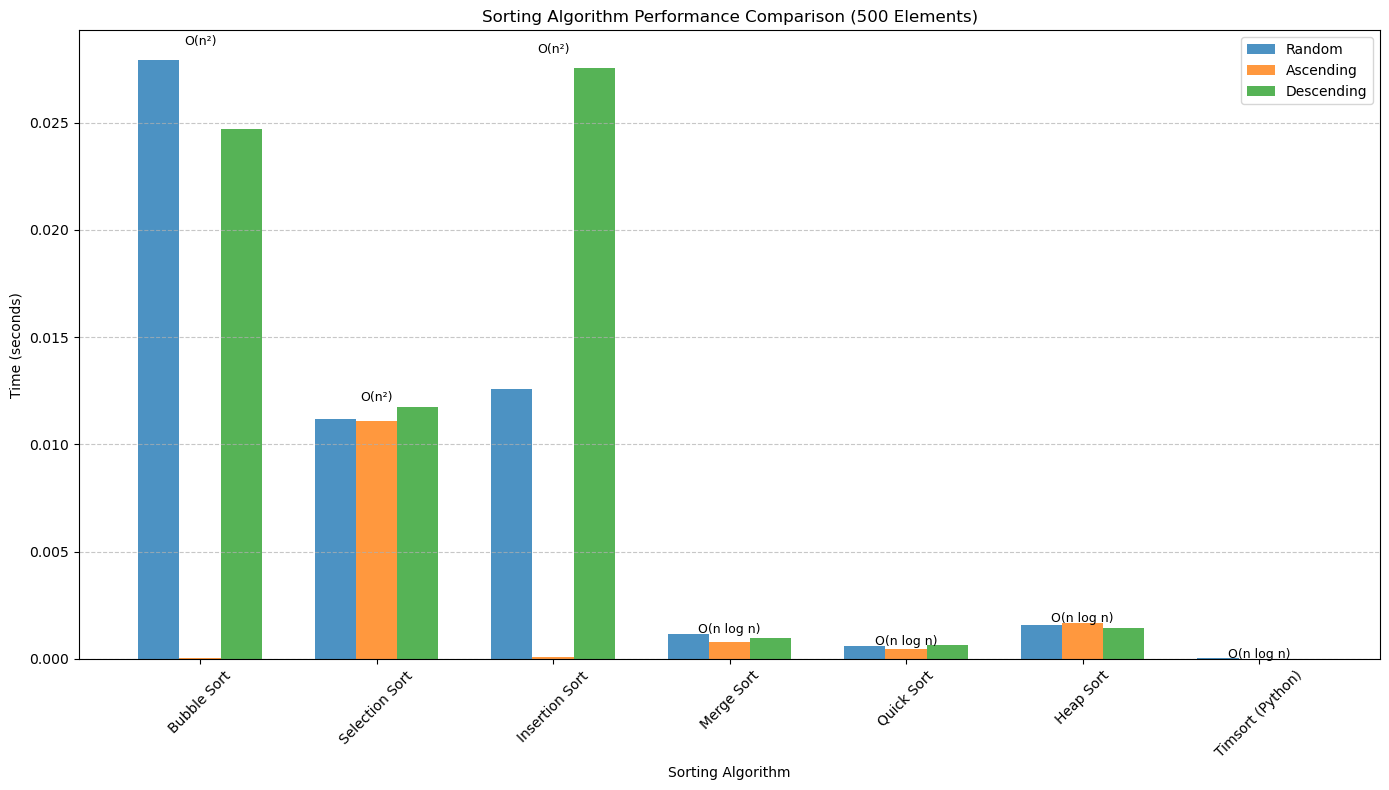

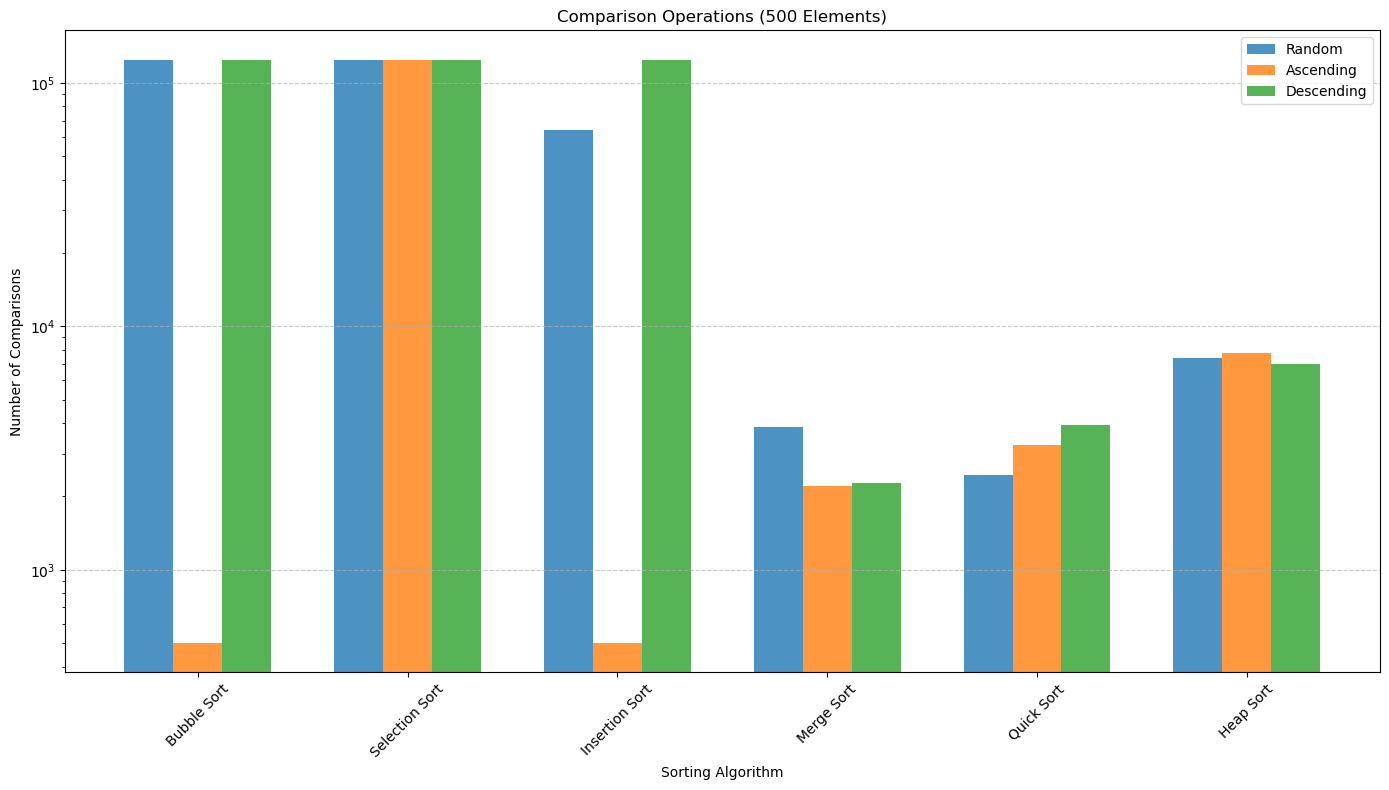

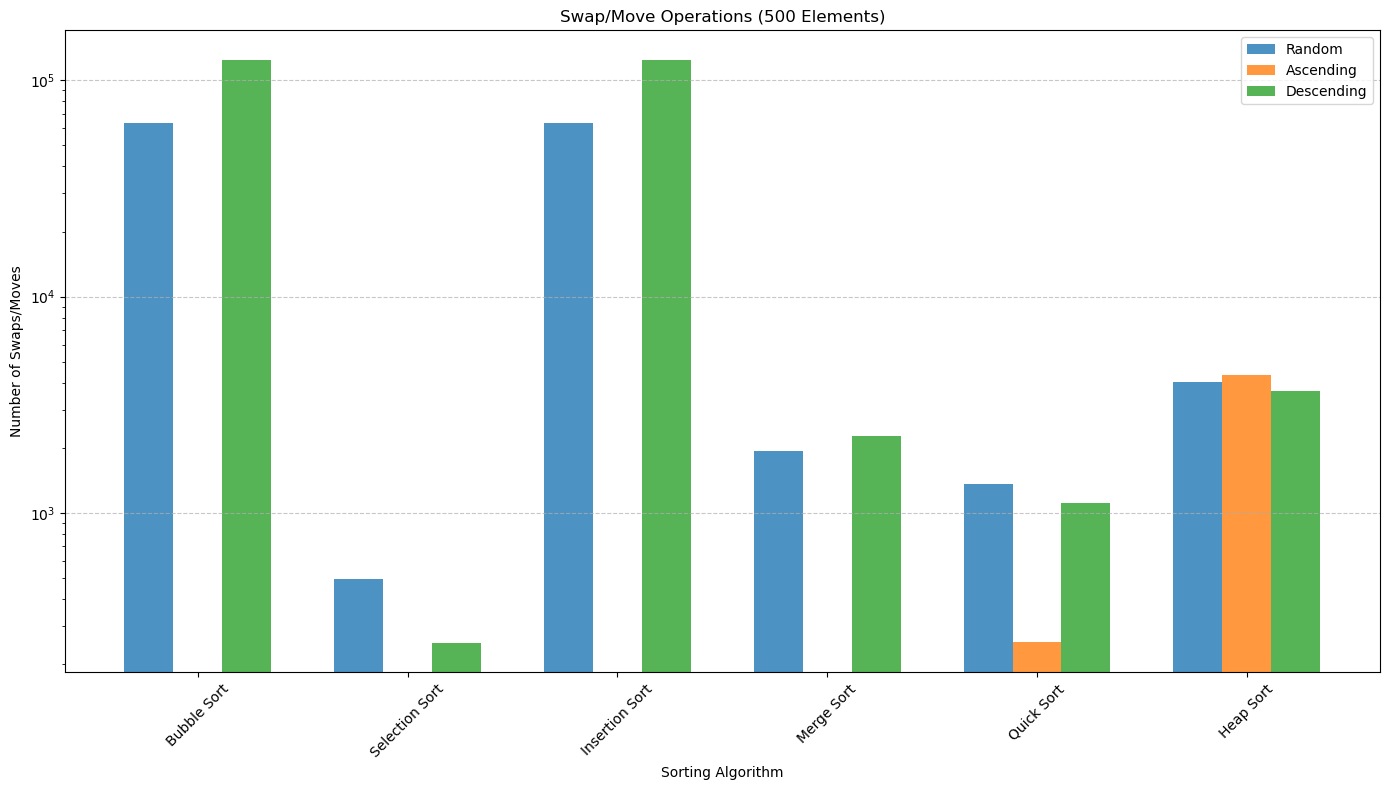


Benchmark completed successfully!


In [1]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
from typing import List, Dict, Callable, Tuple, Optional, Union
import heapq
import argparse
import os
import warnings
from abc import ABC, abstractmethod

# -----------------------------------------------------------------------------
# Base Algorithm Class
# -----------------------------------------------------------------------------
class SortingAlgorithm(ABC):
    """Base class for sorting algorithms."""
    
    @property
    @abstractmethod
    def name(self) -> str:
        """Return the name of the algorithm."""
        pass
        
    @property
    @abstractmethod
    def time_complexity(self) -> str:
        """Return the time complexity of the algorithm."""
        pass
        
    @property
    @abstractmethod
    def space_complexity(self) -> str:
        """Return the space complexity of the algorithm."""
        pass
        
    @abstractmethod
    def sort(self, arr: List[float]) -> List[float]:
        """Sort the input array."""
        pass
        
    def count_operations(self, arr: List[float]) -> Tuple[int, int]:
        """Count comparisons and swaps during sorting."""
        self.comparisons = 0
        self.swaps = 0
        self.sort(arr.copy())
        return self.comparisons, self.swaps


# -----------------------------------------------------------------------------
# Concrete Algorithm Implementations
# -----------------------------------------------------------------------------
class BubbleSort(SortingAlgorithm):
    """Optimized Bubble Sort Algorithm."""
    
    @property
    def name(self) -> str:
        return "Bubble Sort"
        
    @property
    def time_complexity(self) -> str:
        return "O(n²)"
        
    @property
    def space_complexity(self) -> str:
        return "O(1)"
    
    def sort(self, arr: List[float]) -> List[float]:
        n = len(arr)
        self.comparisons = 0
        self.swaps = 0
        
        for i in range(n - 1):
            swapped = False
            for j in range(n - i - 1):
                self.comparisons += 1
                if arr[j] > arr[j + 1]:
                    arr[j], arr[j + 1] = arr[j + 1], arr[j]
                    self.swaps += 1
                    swapped = True
            if not swapped:
                break
                
        return arr


class SelectionSort(SortingAlgorithm):
    """Selection Sort Algorithm."""
    
    @property
    def name(self) -> str:
        return "Selection Sort"
        
    @property
    def time_complexity(self) -> str:
        return "O(n²)"
        
    @property
    def space_complexity(self) -> str:
        return "O(1)"
    
    def sort(self, arr: List[float]) -> List[float]:
        n = len(arr)
        self.comparisons = 0
        self.swaps = 0
        
        for i in range(n - 1):
            min_idx = i
            for j in range(i + 1, n):
                self.comparisons += 1
                if arr[j] < arr[min_idx]:
                    min_idx = j
                    
            if min_idx != i:
                arr[i], arr[min_idx] = arr[min_idx], arr[i]
                self.swaps += 1
                
        return arr


class InsertionSort(SortingAlgorithm):
    """Insertion Sort Algorithm."""
    
    @property
    def name(self) -> str:
        return "Insertion Sort"
        
    @property
    def time_complexity(self) -> str:
        return "O(n²)"
        
    @property
    def space_complexity(self) -> str:
        return "O(1)"
    
    def sort(self, arr: List[float]) -> List[float]:
        n = len(arr)
        self.comparisons = 0
        self.swaps = 0
        
        for i in range(1, n):
            key = arr[i]
            j = i - 1
            
            while j >= 0:
                self.comparisons += 1
                if arr[j] > key:
                    arr[j + 1] = arr[j]
                    self.swaps += 1
                    j -= 1
                else:
                    break
                    
            arr[j + 1] = key
            
        return arr


class MergeSort(SortingAlgorithm):
    """Merge Sort Algorithm."""
    
    @property
    def name(self) -> str:
        return "Merge Sort"
        
    @property
    def time_complexity(self) -> str:
        return "O(n log n)"
        
    @property
    def space_complexity(self) -> str:
        return "O(n)"
    
    def sort(self, arr: List[float]) -> List[float]:
        self.comparisons = 0
        self.swaps = 0
        return self._merge_sort(arr)
        
    def _merge_sort(self, arr: List[float]) -> List[float]:
        if len(arr) <= 1:
            return arr
            
        mid = len(arr) // 2
        left = self._merge_sort(arr[:mid])
        right = self._merge_sort(arr[mid:])
        
        return self._merge(left, right)
    
    def _merge(self, left: List[float], right: List[float]) -> List[float]:
        merged = []
        i = j = 0
        
        while i < len(left) and j < len(right):
            self.comparisons += 1
            if left[i] <= right[j]:
                merged.append(left[i])
                i += 1
            else:
                merged.append(right[j])
                j += 1
                self.swaps += 1  # Counting inversions as swaps
                
        merged.extend(left[i:])
        merged.extend(right[j:])
        
        return merged


class QuickSort(SortingAlgorithm):
    """Quick Sort Algorithm with median-of-three pivot selection."""
    
    @property
    def name(self) -> str:
        return "Quick Sort"
        
    @property
    def time_complexity(self) -> str:
        return "O(n log n)"
        
    @property
    def space_complexity(self) -> str:
        return "O(log n)"
    
    def sort(self, arr: List[float]) -> List[float]:
        self.comparisons = 0
        self.swaps = 0
        self._quick_sort(arr, 0, len(arr) - 1)
        return arr
        
    def _quick_sort(self, arr: List[float], low: int, high: int) -> None:
        if low < high:
            pivot_idx = self._partition(arr, low, high)
            self._quick_sort(arr, low, pivot_idx - 1)
            self._quick_sort(arr, pivot_idx + 1, high)
    
    def _get_pivot(self, arr: List[float], low: int, high: int) -> float:
        """Median-of-three pivot selection."""
        mid = (low + high) // 2
        
        # Sort low, mid, high elements
        if arr[low] > arr[mid]:
            arr[low], arr[mid] = arr[mid], arr[low]
            self.swaps += 1
        
        if arr[mid] > arr[high]:
            arr[mid], arr[high] = arr[high], arr[mid]
            self.swaps += 1
            
        if arr[low] > arr[mid]:
            arr[low], arr[mid] = arr[mid], arr[low]
            self.swaps += 1
            
        # Move pivot to high-1 position
        arr[mid], arr[high - 1] = arr[high - 1], arr[mid]
        self.swaps += 1
        return arr[high - 1]
    
    def _partition(self, arr: List[float], low: int, high: int) -> int:
        if high - low > 2:
            pivot = self._get_pivot(arr, low, high)
            i = low
            j = high - 1
            
            while True:
                i += 1
                while arr[i] < pivot:
                    self.comparisons += 1
                    i += 1
                
                j -= 1
                while arr[j] > pivot:
                    self.comparisons += 1
                    j -= 1
                
                if i >= j:
                    break
                
                arr[i], arr[j] = arr[j], arr[i]
                self.swaps += 1
            
            arr[i], arr[high - 1] = arr[high - 1], arr[i]
            self.swaps += 1
            return i
        else:
            # For small arrays, use insertion sort logic
            self.comparisons += 1
            if arr[low] > arr[high]:
                arr[low], arr[high] = arr[high], arr[low]
                self.swaps += 1
            return high


class HeapSort(SortingAlgorithm):
    """Heap Sort Algorithm (properly implemented, not just using heapq)."""
    
    @property
    def name(self) -> str:
        return "Heap Sort"
        
    @property
    def time_complexity(self) -> str:
        return "O(n log n)"
        
    @property
    def space_complexity(self) -> str:
        return "O(1)"
    
    def sort(self, arr: List[float]) -> List[float]:
        n = len(arr)
        self.comparisons = 0
        self.swaps = 0
        
        # Build max heap
        for i in range(n // 2 - 1, -1, -1):
            self._heapify(arr, n, i)
            
        # Extract elements one by one
        for i in range(n - 1, 0, -1):
            arr[0], arr[i] = arr[i], arr[0]
            self.swaps += 1
            self._heapify(arr, i, 0)
            
        return arr
    
    def _heapify(self, arr: List[float], n: int, i: int) -> None:
        largest = i
        left = 2 * i + 1
        right = 2 * i + 2
        
        # Check if left child exists and is greater than root
        if left < n:
            self.comparisons += 1
            if arr[left] > arr[largest]:
                largest = left
        
        # Check if right child exists and is greater than largest so far
        if right < n:
            self.comparisons += 1
            if arr[right] > arr[largest]:
                largest = right
        
        # Change root if needed
        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            self.swaps += 1
            # Recursively heapify the affected sub-tree
            self._heapify(arr, n, largest)


class TimSort(SortingAlgorithm):
    """Python's built-in Timsort implementation."""
    
    @property
    def name(self) -> str:
        return "Timsort (Python)"
        
    @property
    def time_complexity(self) -> str:
        return "O(n log n)"
        
    @property
    def space_complexity(self) -> str:
        return "O(n)"
    
    def sort(self, arr: List[float]) -> List[float]:
        # We can't track operations for Python's built-in sort
        self.comparisons = float('nan')
        self.swaps = float('nan')
        return sorted(arr)


# -----------------------------------------------------------------------------
# Benchmarking Module
# -----------------------------------------------------------------------------
class SortingBenchmark:
    """Benchmarking system for sorting algorithms."""
    
    def __init__(self, algorithms: Optional[List[SortingAlgorithm]] = None):
        if algorithms is None:
            self.algorithms = [
                BubbleSort(),
                SelectionSort(),
                InsertionSort(),
                MergeSort(),
                QuickSort(),
                HeapSort(),
                TimSort()
            ]
        else:
            self.algorithms = algorithms
    
    def generate_datasets(self, size: int, include_partial: bool = False) -> Dict[str, List[float]]:
        """Generate datasets for benchmarking."""
        if size > 10_000:
            warnings.warn(f"Large dataset size ({size:,}) may cause slow performance for O(n²) algorithms")
            
        random_numbers = np.random.rand(size).tolist()
        datasets = {
            "Random": random_numbers,
            "Ascending": sorted(random_numbers),
            "Descending": sorted(random_numbers, reverse=True)
        }
        
        if include_partial:
            # Partially sorted array (70% sorted)
            partial = sorted(random_numbers[:int(size * 0.7)]) + random_numbers[int(size * 0.7):]
            datasets["Partially Sorted"] = partial
            
        return datasets
    
    def measure_time(self, algorithm: SortingAlgorithm, arr: List[float]) -> float:
        """Measure execution time of a sorting function."""
        return timeit.timeit(lambda: algorithm.sort(arr.copy()), number=1)
    
    def benchmark(self, datasets: Dict[str, List[float]]) -> Dict[str, Dict[str, Dict[str, float]]]:
        """Run benchmark on all algorithms and datasets."""
        results = {}
        operations = {}
        
        total_combinations = len(self.algorithms) * len(datasets)
        current = 0
        
        for dataset_name, dataset in datasets.items():
            results[dataset_name] = {}
            operations[dataset_name] = {}
            
            for algorithm in self.algorithms:
                current += 1
                print(f"Benchmarking {algorithm.name} on {dataset_name} data... ({current}/{total_combinations})")
                
                # Skip extremely slow combinations for large datasets
                skip = False
                if len(dataset) > 5000 and algorithm.name in ["Bubble Sort", "Selection Sort", "Insertion Sort"]:
                    if dataset_name in ["Random", "Descending"]:
                        print(f"  Skipping {algorithm.name} on large {dataset_name} dataset (would be too slow)")
                        skip = True
                
                if skip:
                    exec_time = float('inf')
                    comparisons, swaps = float('nan'), float('nan')
                else:
                    # Measure time
                    exec_time = self.measure_time(algorithm, dataset)
                    
                    # Count operations (if not already done)
                    try:
                        comparisons, swaps = algorithm.count_operations(dataset)
                    except:
                        comparisons, swaps = float('nan'), float('nan')
                
                results[dataset_name][algorithm.name] = exec_time
                operations[dataset_name][algorithm.name] = {
                    'comparisons': comparisons,
                    'swaps': swaps
                }
        
        return {"times": results, "operations": operations}


# -----------------------------------------------------------------------------
# Visualization Module
# -----------------------------------------------------------------------------
class SortingVisualizer:
    """Visualization tools for sorting benchmarks."""
    
    def __init__(self, algorithms: List[SortingAlgorithm], results: Dict):
        self.algorithms = algorithms
        self.results = results
        
    def display_results_table(self, dataset_size: int) -> None:
        """Display results in a formatted table."""
        times = self.results["times"]
        operations = self.results["operations"]
        
        # Print execution times
        print("\nExecution times (seconds):")
        print("-" * 100)
        headers = ["Algorithm", "Time Complexity", "Space Complexity"] + list(times.keys())
        print("  ".join(f"{h:<15}" for h in headers))
        print("-" * 100)
        
        for algorithm in self.algorithms:
            row = [
                algorithm.name, 
                algorithm.time_complexity,
                algorithm.space_complexity
            ]
            
            for dataset in times.keys():
                exec_time = times[dataset].get(algorithm.name, float('inf'))
                if exec_time == float('inf'):
                    row.append("SKIPPED")
                else:
                    row.append(f"{exec_time:.5f}")
            
            print("  ".join(f"{col:<15}" for col in row))
        
        # Print operation counts
        print("\nComparisons:")
        print("-" * 100)
        print("  ".join(f"{h:<15}" for h in ["Algorithm"] + list(times.keys())))
        print("-" * 100)
        
        for algorithm in self.algorithms:
            row = [algorithm.name]
            
            for dataset in operations.keys():
                if algorithm.name in operations[dataset]:
                    comps = operations[dataset][algorithm.name]['comparisons']
                    if not np.isnan(comps):
                        row.append(f"{int(comps):,}")
                    else:
                        row.append("N/A")
                else:
                    row.append("N/A")
            
            print("  ".join(f"{col:<15}" for col in row))
        
        # Print swap counts
        print("\nSwaps/Moves:")
        print("-" * 100)
        print("  ".join(f"{h:<15}" for h in ["Algorithm"] + list(times.keys())))
        print("-" * 100)
        
        for algorithm in self.algorithms:
            row = [algorithm.name]
            
            for dataset in operations.keys():
                if algorithm.name in operations[dataset]:
                    swaps = operations[dataset][algorithm.name]['swaps']
                    if not np.isnan(swaps):
                        row.append(f"{int(swaps):,}")
                    else:
                        row.append("N/A")
                else:
                    row.append("N/A")
            
            print("  ".join(f"{col:<15}" for col in row))
    
    def visualize_time_comparison(self, dataset_size: int, log_scale: bool = False, save_path: Optional[str] = None) -> None:
        """Create a bar chart comparing algorithm performance."""
        times = self.results["times"]
        dataset_names = list(times.keys())
        algorithm_names = [algo.name for algo in self.algorithms]
        
        # Create figure
        plt.figure(figsize=(14, 8))
        bar_width = 0.7 / len(dataset_names)
        opacity = 0.8
        
        # Plot bars for each dataset
        for i, dataset_name in enumerate(dataset_names):
            dataset_times = []
            for algo_name in algorithm_names:
                # Replace inf with the max non-inf value for visualization
                time_value = times[dataset_name].get(algo_name, 0)
                if time_value == float('inf'):
                    max_time = max([t for ds in times.values() for t in ds.values() if t != float('inf')], default=1)
                    time_value = max_time * 1.2
                dataset_times.append(time_value)
            
            x_positions = np.arange(len(algorithm_names)) + i * bar_width - (len(dataset_names) - 1) * bar_width / 2
            plt.bar(x_positions, dataset_times, bar_width, alpha=opacity, label=dataset_name)
        
        # Add complexity annotations
        if not log_scale:
            for i, algo in enumerate(self.algorithms):
                y_pos = max([times[ds].get(algo.name, 0) for ds in dataset_names if times[ds].get(algo.name, 0) != float('inf')])
                if y_pos > 0:
                    plt.text(i, y_pos * 1.025, algo.time_complexity, ha='center', rotation=0, size=9)
        
        # Configure chart
        plt.ylabel("Time (seconds)")
        plt.xlabel("Sorting Algorithm")
        plt.title(f"Sorting Algorithm Performance Comparison ({dataset_size:,} Elements)")
        plt.xticks(np.arange(len(algorithm_names)), algorithm_names, rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.legend()
        
        if log_scale:
            plt.yscale('log')
            plt.ylabel("Time (seconds) - Log Scale")
        
        plt.tight_layout()
        
        # Save or show the figure
        if save_path:
            plt.savefig(save_path)
            print(f"Figure saved to {save_path}")
        else:
            plt.show()
    
    def visualize_operations(self, dataset_size: int, save_path: Optional[str] = None) -> None:
        """Create a chart comparing operation counts."""
        operations = self.results["operations"]
        dataset_names = list(operations.keys())
        algorithm_names = [algo.name for algo in self.algorithms if algo.name != "Timsort (Python)"]
        
        # Filter out algorithms with NaN operations
        valid_algorithms = []
        for algo_name in algorithm_names:
            if not np.isnan(operations[dataset_names[0]].get(algo_name, {}).get('comparisons', float('nan'))):
                valid_algorithms.append(algo_name)
        
        if not valid_algorithms:
            print("No valid operation data to visualize")
            return
        
        # Create comparisons chart
        plt.figure(figsize=(14, 8))
        bar_width = 0.7 / len(dataset_names)
        opacity = 0.8
        
        for i, dataset_name in enumerate(dataset_names):
            comparisons = []
            for algo_name in valid_algorithms:
                comp_value = operations[dataset_name].get(algo_name, {}).get('comparisons', 0)
                comparisons.append(comp_value)
            
            x_positions = np.arange(len(valid_algorithms)) + i * bar_width - (len(dataset_names) - 1) * bar_width / 2
            plt.bar(x_positions, comparisons, bar_width, alpha=opacity, label=dataset_name)
        
        plt.ylabel("Number of Comparisons")
        plt.xlabel("Sorting Algorithm")
        plt.title(f"Comparison Operations ({dataset_size:,} Elements)")
        plt.xticks(np.arange(len(valid_algorithms)), valid_algorithms, rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.legend()
        plt.yscale('log')
        plt.tight_layout()
        
        if save_path:
            comparison_path = save_path.replace('.png', '_comparisons.png')
            plt.savefig(comparison_path)
            print(f"Comparisons figure saved to {comparison_path}")
        else:
            plt.show()
            
        # Create swaps chart
        plt.figure(figsize=(14, 8))
        
        for i, dataset_name in enumerate(dataset_names):
            swaps = []
            for algo_name in valid_algorithms:
                swap_value = operations[dataset_name].get(algo_name, {}).get('swaps', 0)
                swaps.append(swap_value)
            
            x_positions = np.arange(len(valid_algorithms)) + i * bar_width - (len(dataset_names) - 1) * bar_width / 2
            plt.bar(x_positions, swaps, bar_width, alpha=opacity, label=dataset_name)
        
        plt.ylabel("Number of Swaps/Moves")
        plt.xlabel("Sorting Algorithm")
        plt.title(f"Swap/Move Operations ({dataset_size:,} Elements)")
        plt.xticks(np.arange(len(valid_algorithms)), valid_algorithms, rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.legend()
        plt.yscale('log')
        plt.tight_layout()
        
        if save_path:
            swaps_path = save_path.replace('.png', '_swaps.png')
            plt.savefig(swaps_path)
            print(f"Swaps figure saved to {swaps_path}")
        else:
            plt.show()

# -----------------------------------------------------------------------------
# Main Application
# -----------------------------------------------------------------------------
def parse_arguments():
    """Parse command-line arguments."""
    parser = argparse.ArgumentParser(description="Sorting Algorithm Benchmark")
    
    parser.add_argument("--size", type=int, default=1000, 
                       help="Dataset size (default: 1000)")
    
    parser.add_argument("--partial", action="store_true",
                       help="Include partially sorted dataset")
    
    parser.add_argument("--log", action="store_true",
                       help="Use logarithmic scale for time visualization")
    
    parser.add_argument("--save", type=str, default=None,
                       help="Save visualizations to specified directory")
    
    parser.add_argument("--skip", type=str, nargs="+", default=[],
                       help="Skip specific algorithms (e.g. --skip 'Bubble Sort' 'Selection Sort')")
    
    parser.add_argument("--max-size", type=int, default=10000,
                       help="Maximum allowed dataset size to prevent memory issues")
    
    return parser.parse_args()

def validate_input(prompt: str, min_val: int, max_val: int, default: int) -> int:
    """Validate user input with bounds."""
    while True:
        try:
            user_input = input(f"{prompt} [{default}]: ").strip()
            if not user_input:
                return default
                
            value = int(user_input)
            if value < min_val:
                print(f"Error: Value must be at least {min_val}")
            elif value > max_val:
                print(f"Error: Value must be at most {max_val}")
            else:
                return value
        except ValueError:
            print("Error: Please enter a valid integer")


def interactive_mode() -> argparse.Namespace:
    """Interactive mode for configuration."""
    print("\n" + "=" * 50)
    print("Sorting Algorithm Benchmark - Interactive Mode")
    print("=" * 50)
    
    args = argparse.Namespace()
    
    # Dataset size
    args.size = validate_input("Enter dataset size", 10, 100000, 1000)
    
    # Include partially sorted
    user_input = input("Include partially sorted dataset? (y/n) [n]: ").strip().lower()
    args.partial = user_input.startswith('y')
    
    # Log scale
    user_input = input("Use logarithmic scale for visualization? (y/n) [y]: ").strip().lower()
    args.log = not user_input.startswith('n')
    
    # Save visualizations
    user_input = input("Save visualizations to file? (y/n) [n]: ").strip().lower()
    if user_input.startswith('y'):
        args.save = input("Enter directory to save files: ").strip()
    else:
        args.save = None
    
    # Skip algorithms
    algorithms = ["Bubble Sort", "Selection Sort", "Insertion Sort", 
                  "Merge Sort", "Quick Sort", "Heap Sort", "Timsort (Python)"]
    
    print("\nAvailable algorithms:")
    for i, algo in enumerate(algorithms, 1):
        print(f"{i}. {algo}")
    
    user_input = input("\nSkip any algorithms? Enter numbers separated by spaces (e.g. '1 2')\nElse, hit enter with blank input if you don't want to skip any algorithms!: ").strip()
    if user_input:
        try:
            skip_indices = [int(idx) - 1 for idx in user_input.split()]
            args.skip = [algorithms[idx] for idx in skip_indices if 0 <= idx < len(algorithms)]
        except ValueError:
            print("Invalid input, using all algorithms")
            args.skip = []
    else:
        args.skip = []
    
    args.max_size = 100000
    
    return args


def main():
    """Main execution function."""
    try:
        # Check if running in interactive environment
        is_interactive = hasattr(sys, 'ps1') or not sys.argv[0]
        
        if is_interactive:
            args = interactive_mode()
        else:
            args = parse_arguments()
        
        # Validate dataset size
        if args.size <= 0:
            print("Error: Dataset size must be positive")
            return
        elif args.size > args.max_size:
            print(f"Error: Dataset size exceeds maximum allowed size ({args.max_size:,})")
            print(f"Large datasets may cause memory issues or extremely long execution times")
            user_input = input("Continue anyway? (y/n): ").strip().lower()
            if not user_input.startswith('y'):
                return
        
        # Create algorithm instances
        all_algorithms = [
            BubbleSort(),
            SelectionSort(),
            InsertionSort(),
            MergeSort(),
            QuickSort(),
            HeapSort(),
            TimSort()
        ]
        
        # Filter out skipped algorithms
        algorithms = [algo for algo in all_algorithms if algo.name not in args.skip]
        
        # Create benchmark instance
        benchmark = SortingBenchmark(algorithms)
        
        # Generate datasets
        print(f"Generating datasets of size {args.size:,}...")
        datasets = benchmark.generate_datasets(args.size, args.partial)
        
        # Run benchmarks
        print("\nBenchmarking sorting algorithms...")
        results = benchmark.benchmark(datasets)
        
        # Create visualizer
        visualizer = SortingVisualizer(algorithms, results)
        
        # Display results table
        visualizer.display_results_table(args.size)
        
        # Create save path if needed
        save_path = None
        if args.save:
            os.makedirs(args.save, exist_ok=True)
            save_path = os.path.join(args.save, f"sorting_benchmark_{args.size}.png")
        
        # Visualize results
        print("\nGenerating visualizations...")
        visualizer.visualize_time_comparison(args.size, args.log, save_path)
        visualizer.visualize_operations(args.size, save_path)
        
        print("\nBenchmark completed successfully!")
        
    except ValueError as e:
        print(f"Error: {e}")
    except MemoryError:
        print("Error: Not enough memory for this dataset size")
    except KeyboardInterrupt:
        print("\nBenchmark interrupted by user")
    except Exception as e:
        print(f"Unexpected error: {e}")

if __name__ == "__main__":
    import sys
    main()